In [34]:
import numpy as np
import pandas as pd
# plotting library
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout,Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K
from keras.utils import to_categorical

In [35]:
# import dataset
from keras.datasets import mnist

In [36]:
# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [37]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [38]:
# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))


Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [39]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

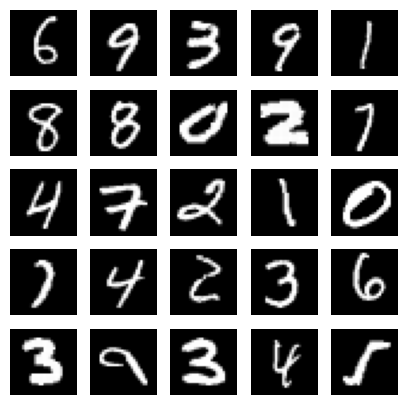

In [40]:
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [41]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='summer')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

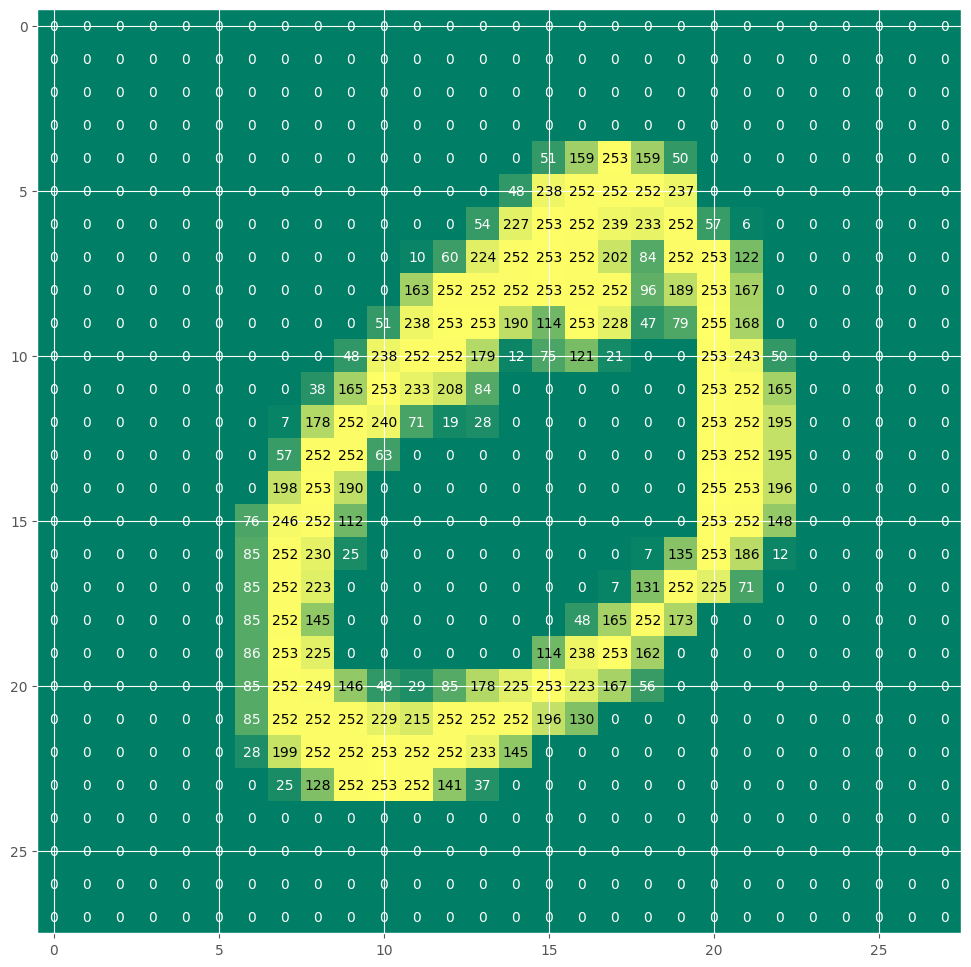

In [42]:
#Visualizing for digit MNIST
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
visualize_input(x_train[1], ax)
plt.show()

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [44]:
### Step 3: Preprocess Data
# Reshape data to fit CNN (samples, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [45]:
# Normalize pixel values to range [0,1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [46]:
# convert to one-hot vector
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [13]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [55]:
# network parameters
batch_size = 128
epochs=10
num_labels=10

In [56]:
# model is of 3-layer with ReLU and dropout after each layer
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))



c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
model.add(Flatten())

In [61]:
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))

In [62]:
model.add(Dense(num_labels,activation="softmax"))

In [63]:
model.compile(loss="categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [64]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [66]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [67]:
epochs=20
mnist_model=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.7214 - loss: 0.8450 - val_accuracy: 0.9670 - val_loss: 0.1069
Epoch 2/20
298/469 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9555 - loss: 0.1528

KeyboardInterrupt: 

In [24]:
train_loss, train_acc = model.evaluate(x_train, y_train, batch_size=batch_size)
print("\nTrain accuracy: %.1f%%" % (100.0 * train_acc))

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 6.8973e-04

Train accuracy: 100.0%


In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * test_acc))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9805 - loss: 0.1369

Test accuracy: 98.4%


In [27]:
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [28]:
#Predicting the labels-DIGIT
y_predict = model.predict(x_test)
y_predict=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step


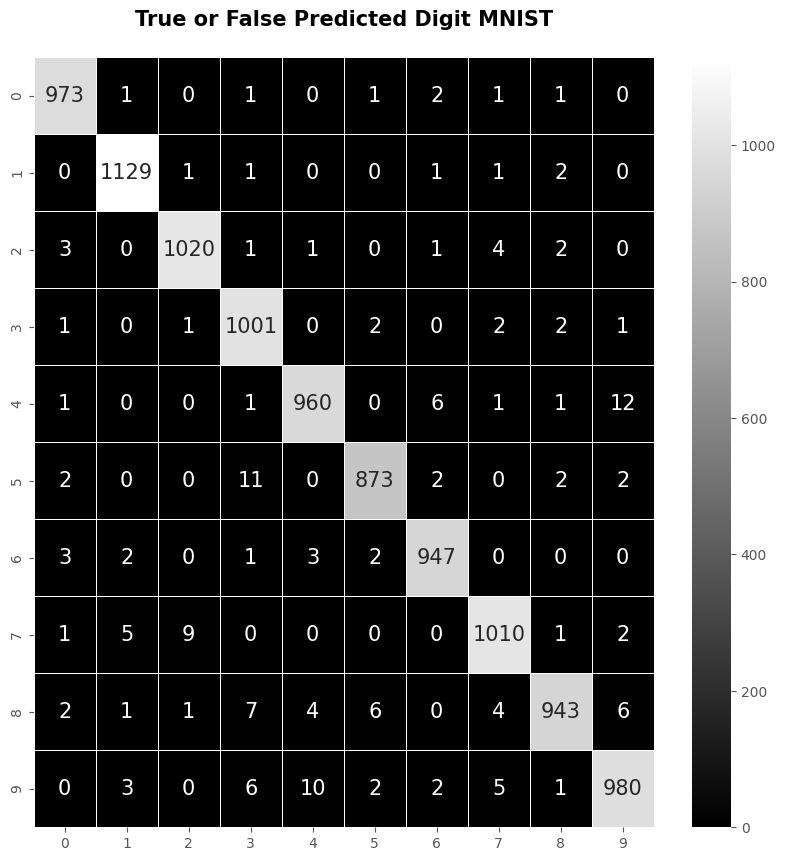

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
con_mat = confusion_matrix(y_test_digit_eval, y_predict)

# Use an available Matplotlib style
plt.style.use('ggplot')  # Change this if needed based on available styles

# Plot confusion matrix heatmap
plt.figure(figsize=(10,10))
sns.heatmap(con_mat, annot=True, annot_kws={'size': 15}, linewidths=0.5, fmt="d", cmap="gray")
plt.title('True or False Predicted Digit MNIST\n', fontweight='bold', fontsize=15)
plt.show()

In [32]:
%matplotlib inline
plt.style.use("ggplot")
plt.figure(figsize=(20, 10))
plt.plot(np.arange(0, epochs), mnist_model.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), mnist_model.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), mnist_model.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), mnist_model.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.yticks(np.arange(0.01, 1.01, step=0.1))
plt.legend(loc="lower left")